# 2層ニューラルネットワークでMNISTを解く

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from common.activations import softmax, sigmoid
from common.grad import numerical_gradient
from common.loss import cross_entropy_error

## 2層ニューラルネットワーククラスに正解率(Accuracy)を求める関数を追加

### [演習]
* 2層ニューラルネットワーククラスに正解率(Accuracy)を求める関数を追加しましょう

In [2]:
# ヒント
y = np.array([
            [0.1, 0.9],
            [0.8, 0.2],
            [0.3, 0.7]])
t = np.array([
            [0, 1],
            [0, 1],
            [1, 0]])

y = np.argmax(y, axis=1)
print("argmax(y)=", y)

t = np.argmax(t, axis=1)
print("argmax(t)=", t)

print(np.sum(y==t))

argmax(y)= [1 0 1]
argmax(t)= [1 1 0]
1


In [4]:
class TwoLayerNet():
    def __init__(self, input_size, hidden_size, output_size):
        
        # 重みの初期化
        self.params = {}
        init_std=0.01
        np.random.seed(1234)
        self.params["W1"] = init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
                
    def predict(self, x):
        """
        予測関数
        x : 入力データ
        """
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        
        h1 = np.dot(x, W1) + b1
        z1 = sigmoid(h1)
        h2 = np.dot(z1, W2) + b2
        y = softmax(h2)
        return y
    
    def loss(self, x, t):
        """
        損失関数
        x : 入力データ
        t : 正解データ
        """
        y = self.predict(x)
        loss = cross_entropy_error(y, t)
        return loss
    
    def gradient(self, x, t):
        """
        勾配計算関数
        """
        grads={}
        f = self.loss
        grads["W1"] = numerical_gradient(f, x, self.params["W1"], t)
        grads["b1"] = numerical_gradient(f, x, self.params["b1"], t)
        grads["W2"] = numerical_gradient(f, x, self.params["W2"], t)
        grads["b2"] = numerical_gradient(f, x, self.params["b2"], t)
        return grads
    
    def accuracy(self, x, t):
        """
        正解率を算出する関数
        """
        y = self.predict(  x    )
        y = np.argmax(   y , axis=1)
        t = np.argmax(  t  , axis=1)
        return np.sum(  y == t ) / y.shape[0]

## MNISTデータの読み込み

In [5]:
# Load the MNIST dataset
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

train = X_train/255
test = X_test/255
train = train.reshape(-1, 28*28)
test = test.reshape(-1, 28*28)
train_labels = lb.fit_transform(y_train)
test_labels = lb.fit_transform(y_test)

## ミニバッチ学習を行う

### [演習]
* 以下のミニバッチ学習を完成させましょう。  
* ここでは、計算が実行できることを確認できればよいので、計算に用いるデータの数は少なくしています。  
* 計算の進行と共に損失が小さくなっていくことを確認したい場合は、以下の条件を変更する必要があります。ただし、変更すると計算時間が長くなるのでご注意ください。  
```
x = train[:9,:]  
t = train_labels[:9,:]  
epochs = 10  
batch_size = 3  
```

In [8]:
x = train[:9,:]
t = train_labels[:9,:]
epochs = 10
batch_size = 3
lr = 0.01

# 繰り返し回数
xsize = x.shape[0]
iter_num = np.ceil(xsize / batch_size).astype(np.int) # ceilは切り上げ関数

# 2層NNのオブジェクト生成
tnet = TwoLayerNet(input_size=28*28, hidden_size=100, output_size=10)

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
for epoch in range(epochs):
    print("epoch=%s"%epoch)
    
    # シャッフル
    idx = np.arange(xsize)
    np.random.shuffle(idx)

    for it in range(iter_num):
        """
        ランダムなミニバッチを順番に取り出す
        """
        mask = idx[batch_size*it : batch_size*(it+1)]
    
        # ミニバッチの生成
        x_train = x[mask]
        t_train = t[mask]
        
        # 勾配の計算
        grads = tnet.gradient( x_train    ,  t_train    )

        # パラメータの更新
        for key in tnet.params.keys():
    #         print(key)
            tnet.params[key] -= lr * grads[key]

    ## 学習経過の記録 ##
    
    # 訓練データにおけるloss
    train_loss.append(tnet.loss(  train  , train_labels  ))
    
    # テストデータにおけるloss
    test_loss.append(tnet.loss(  test  , test_labels   ))
    
    # 訓練データにて精度を確認
    train_accuracy.append(tnet.accuracy(   train , train_labels   ))

    # テストデータにて精度を算出
    test_accuracy.append(tnet.accuracy( test  , test_labels    ))

epoch=0
epoch=1
epoch=2
epoch=3
epoch=4
epoch=5
epoch=6
epoch=7
epoch=8
epoch=9


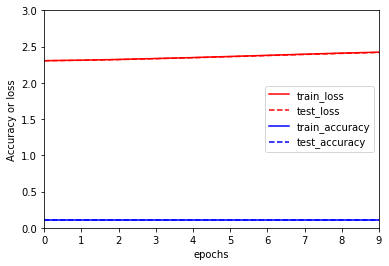

In [9]:
# lossとaccuracyの変化をグラフ化
df_log = pd.DataFrame({"train_loss":train_loss,
             "test_loss":test_loss,
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})
df_log.plot(style=['r-', 'r--', 'b-', 'b--'])
plt.ylim([0,3])
plt.ylabel("Accuracy or loss")
plt.xlabel("epochs")
plt.show()